# Avance del proyecto
### Detección de Automobiles Mediante AUV Basado en Transfer learning
### Reconocimiento de X & y 

In [16]:
'''Librerias'''
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''Testeo de datos'''
test_size    = 0.20
seed         = 6
h5_color     = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features.h5'
h5_colorLb   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/color_features_labels.h5'
h5_texture   = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features.h5'
h5_textureLb = 'C:/Users/Junior/Desktop/Proyecto mineria/Features_Data/textural_features_labels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [4]:
'''Normalización'''

'''importar el vector de características y las etiquetas entrenadas'''

h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['Vehicle_Color_Features']
color_features_labels_string   = h5f_colorLb['Vehicle_Color_Features_Labels']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

'''verificar la forma del vector de características y las etiquetas'''

print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))
print("[STATUS] training started...")

'''Dividir X & y'''
x = global_features
Y = color_features_labels

[STATUS] features shape: (2400, 4512)
[STATUS] labels shape: (400, 512)
[STATUS] training started...


In [6]:
'''Dividir X & y'''
x = global_features
Y = color_features_labels

# AlexNet

In [7]:
'''Definicion de '''
x_train, x_test, y_train, y_test = train_test_split(x, Y,
                                        test_size   = test_size,
                                        random_state = seed)

x_train.shape,x_test.shape

(x_train, x_valid) = x_train[2000:], x_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

#print the shape of x_train, x_valid, and x_test

print('x_train =', x_train.shape)
print('x_valid =', x_train.shape)
print('x_test =', x_train.shape)

x_train = (4500, 32, 32, 3)
x_valid = (4500, 32, 32, 3)
x_test = (4500, 32, 32, 3)


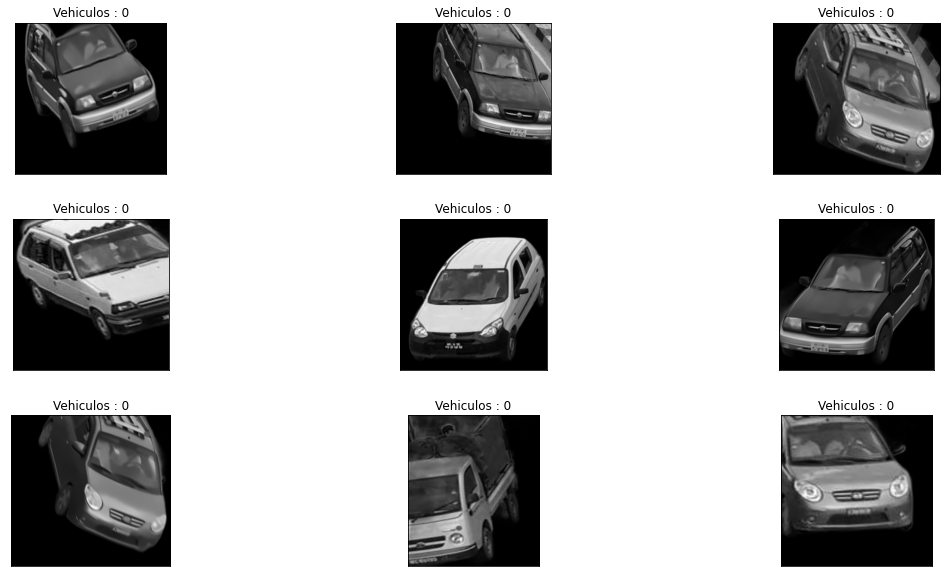

In [8]:
'''Visualiza las imágenes de entrenamiento'''
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (32 , 32))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Vehiculos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [9]:
'''Normalizar los datos Normalizar los valores de píxel de las imágenes restando la media de cada píxel y luego usando la desviación estándar'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [10]:
'''Preprocesar las etiquetas: Codificar etiquetas de enteros categóricos mediante One Hot Scheme'''
num_classes = 3
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
y_valid = np_utils.to_categorical(y_valid,num_classes)

In [11]:
'''Construcción del modelo'''

model = Sequential()

'''layer 1 (Conv + pool + batchnorm)'''
model.add(Conv2D(filters=96, kernel_size = (11,11), strides=(4,4), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

'''layer 2 (Conv + pool + batchnorm)'''
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model.add(BatchNormalization())

'''layer 3 (Conv + batchnorm)'''
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

'''layer 4 (Conv + batchnorm)'''
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

'''layer 5 (Conv + batchnorm)'''
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='same'))

'''Flatten la salida de CNN para alimentarla con capas completamente conectadas'''
model.add(Flatten())

'''layer 6 (Dense layer + dropout)'''
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

'''layer 7 (Dense layers)'''
model.add(Dense(units=4096, activation = 'relu'))
model.add(Dropout(0.5))

'''layer 8 (softmax output layer)'''
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_36 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 3, 3, 96)          384       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
activation_37 (Activation)   (None, 3, 3, 256)         0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 256)       

In [12]:
'''Aumento de datos'''
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 15,
    width_shift_range=0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
'''compute el aumento de datos en el conjunto de entrenamiento'''
datagen.fit(x_train)

In [15]:
'''Compilando y entrenando'''

'''reduce la tasa de aprendizaje en 0,1 cuando el error de validación se estanca'''
checkpointer = ModelCheckpoint(filepath = 'model.125epochs.hdf5', verbose=1, save_best_only=True)

'''establece el optimizador SGD con lr de 0,01 y un impulso de 0,9'''
optimizer = keras.optimizers.SGD(lr=0.01, momentum = 0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 128),
                              callbacks=[checkpointer], steps_per_epoch = x_train.shape[0] // 128, epochs=90, verbose=2, validation_data=(x_valid, y_valid))

In [18]:
'''Evaluar el modelo'''

'''Para evaluar el modelo, usamos una función de Keras llamada *evaluar* e imprimimos los resultados'''
model_probs = model.predict(test_ds, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100


print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)


Accuracy: 88.19
F1 score: 77.07
Recall: 88.19


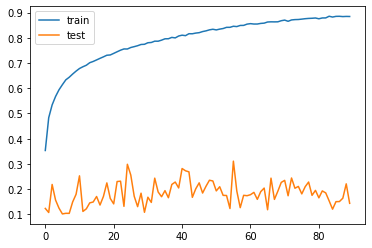

In [19]:
'''Evaluación del modelo'''
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

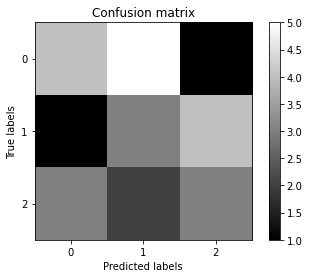

In [20]:
'''Haciendo predicciones'''
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

'''Trazando la matriz de confusión'''
confusion_mtx=confusion_matrix(y_true,y_pred)

targets=['car', 'motor', 'truck']

plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(3)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# ResNet 

In [21]:
'''Librerias para ResNet'''
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

In [11]:
'''Parametros de entrenamiento'''
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = 10
'''Restar la media de píxeles mejora la precisión'''
subtract_pixel_mean = True

In [15]:
xinput_shape = x_train.shape[1:]
'''dimensiones de la imagen de entrada'''
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

'''If para definir los test'''
if subtract_pixel_mean:
  x_train_mean = np.mean(x_train, axis=0)
  x_train -=x_train_mean
  x_test -=x_train_mean

'''Imprimir los datos de texteo'''
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

'''convertir vectores de clase en matrices de clase binaria'''
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

'''La tasa de aprendizaje está programada para disminuir después de 80, 120, 160, 180 épocas
Llamó automáticamente a cada época como parte de las devoluciones de llamada durante el entrenamiento''' 
def lr_schedule(epoch):
  lr = 1e-3
  if epoch > 180:
    lr *=0.5e-3
  elif epoch > 160:
    lr *=1e-3
  elif epoch > 120:
    lr *=1e-2
  elif epoch>80:
    lr *=1e-1
  print('Learning rate: ',lr)
  return lr

x_train shape: (4500, 32, 32, 3)
4500 train samples
1000 test samples
y_train shape: (4500, 1)


In [19]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
   
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))
    """Convolución 2D-Normalización por lotes-Constructor de pilas de activación
         devoluciones
         x (tensor): tensor como entrada a la siguiente capa
    """
    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [22]:
def resnet_v2(input_shape, depth, num_classes=10):
    """Generador de modelos ResNet versión 2 [b]
     # Argumentos
         input_shape (tensor): forma del tensor de imagen de entrada
         profundidad (int): número de capas convolucionales centrales
         num_classes (int): número de clases (CIFAR10 tiene 10)
     # Devoluciones
         modelo (Modelo): instancia del modelo de Keras
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)
    '''Crear una instancia de la pila de unidades residuales'''
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                '''primera capa y primera etapa'''
                num_filters_out = num_filters_in * 4
                if res_block == 0:  
                    activation = None
                    batch_normalization = False
            else:
                '''primera capa pero no primera etapa'''
                num_filters_out = num_filters_in * 2
                if res_block == 0:  
                    '''reducir la muestra'''
                    strides = 2   

            '''unidad residual cuello de botella'''
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                '''Conexión de acceso directo residual de proyección lineal para que coincida
                atenuaciones cambiadas'''
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out
    
    '''Agregar clasificador en la parte superior.
    v2 tiene BN-ReLU antes de la agrupación'''
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    '''Instanciar modelo.'''
    model = Model(inputs=inputs, outputs=outputs)
    return model

'''Prepación del modelo'''
model = resnet_v2(input_shape=input_shape, depth=depth)
'''Determinar precisión'''
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()

Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 32, 32, 16)   64          conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_65 (Activation)      (None, 32, 32, 16)   0           batch_normalization_65[0][0]     
______________________________________________________________________

In [30]:
'''preparar directorio de guardado del modelo'''
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name='cifar10_%s_model.{epoch:03d}.h5'
'''Recorrido del dato h5'''
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
filepath=os.path.join(save_dir, model_name)

In [31]:
'''Preparar devoluciones de llamadas para guardar modelos y ajustar la tasa de aprendizaje'''
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_scheduler=LearningRateScheduler(lr_schedule)
'''Configuración del modelado'''
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer, lr_scheduler]

In [32]:
'''Procesamiento de datos aumentados'''
datagen=ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    shear_range=0.,
    zoom_range=0.,
    fill_mode='nearest',
    horizontal_flip=True
)
datagen.fit(x_train)

In [33]:
'''Validación y ejecución de las capas'''
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_test,y_test),
                    epochs=epochs, verbose=1, workers=4,
                    steps_per_epoch=x_train.shape[0] //batch_size,
                    callbacks=callbacks)

Epoch 1/200
Learning rate:  0.001

   1/1562 [..............................] - ETA: 3:08 - loss: 1.2022 - accuracy: 0.7188

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1562/1562 [==============================] - 62s 39ms/step - loss: 1.3524 - accuracy: 0.6638 - val_loss: 1.2559 - val_accuracy: 0.6802

Epoch 00001: val_accuracy improved from -inf to 0.68020, saving model to /content/saved_models/cifar10_%s_model.001.h5
Epoch 2/200
Learning rate:  0.001
1562/1562 [==============================] - 62s 39ms/step - loss: 1.1535 - accuracy: 0.7160 - val_loss: 1.2173 - val_accuracy: 0.6951

Epoch 00002: val_accuracy improved from 0.68020 to 0.69510, saving model to /content/saved_models/cifar10_%s_model.002.h5
Epoch 3/200
Learning rate:  0.001
1562/1562 [==============================] - 62s 39ms/step - loss: 1.0424 - accuracy: 0.7488 - val_loss: 1.3419 - val_accuracy: 0.6686

Epoch 00003: val_accuracy did not improve from 0.69510
Epoch 4/200
Learning rate:  0.001
1562/1562 [==============================] - 62s 39ms/step - loss: 0.9717 - accuracy: 0.7700 - val_loss: 1.2337 - val_accuracy: 0.6894

Epoch 00004: val_accuracy did not improve from 0.69510
Epo

In [18]:
'''Evaluar el modelo'''

'''Para evaluar el modelo, usamos una función de Keras llamada *evaluar* e imprimimos los resultados'''
model_probs = model.predict(test_ds, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100


print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 91.86
F1 score: 79.07
Recall: 90.11


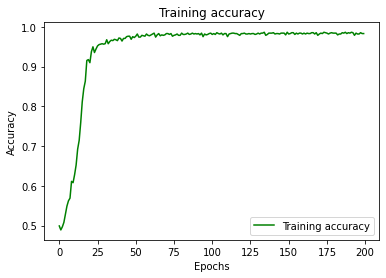

In [19]:
'''Evaluación del modelo'''
plt.plot(history.history['Training Accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

# VGGnet19

In [28]:
'''Librerias'''
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [29]:
'''Preparing the data'''
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
'''Caracteristicas binarias'''
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
'''Modelo Pre-entrenado'''
IMAGE_SIZE = [224, 224]

In [31]:
'''Cargando el modelo VGG, eliminamos la capa de salida por include_top = False'''
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
'''Congelando las capas intermedias se congelan'''
for layer in vgg.layers:
  layer.trainable = False

In [33]:
'''Agregamos nuestra capa de salida con un solo nodo.'''
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [34]:
'''Dado que nuestra tarea de clasificación es binaria, podemos usar la entropía cruzada binaria y adam como optimizador.'''
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
'''Implementaciòn capas finales'''
r = model.fit_generator(
  training_set,  
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
125/125 [==============================] - 31s 245ms/step - loss: 0.4816 - accuracy: 0.7594 - val_loss: 0.2306 - val_accuracy: 0.8990
Epoch 2/15
125/125 [==============================] - 30s 242ms/step - loss: 0.2343 - accuracy: 0.9111 - val_loss: 0.2027 - val_accuracy: 0.9250
Epoch 3/15
125/125 [==============================] - 30s 241ms/step - loss: 0.2140 - accuracy: 0.9179 - val_loss: 0.1993 - val_accuracy: 0.9200
Epoch 4/15
125/125 [==============================] - 30s 241ms/step - loss: 0.1529 - accuracy: 0.9387 - val_loss: 0.1990 - val_accuracy: 0.9240
Epoch 5/15
125/125 [==============================] - 30s 242ms/step - loss: 0.1131 - accuracy: 0.9654 - val_loss: 0.2367 - val_accuracy: 0.8940
Epoch 6/15
125/125 [==============================] - 30s 243ms/step - loss: 0.1107 - accuracy: 0.9559 - val_loss: 0.1920 - val_accuracy: 0.9220
Epoch 7/15
125/125 [==============================] - 30s 241ms/step - loss: 0.1168 - accuracy: 0.9590 - val_loss: 0.2512 - val_ac

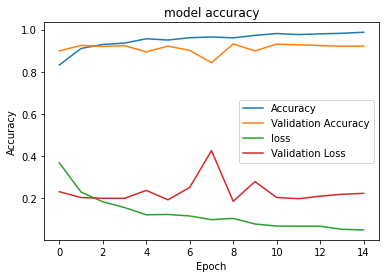

In [36]:
'''Detalle de resultados'''
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [37]:
'''Evaluar el modelo'''

'''Para evaluar el modelo, usamos una función de Keras llamada *evaluar* e imprimimos los resultados'''
model_probs = model.predict(test_ds, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100


print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Recall: %.2f' % recall)

Accuracy: 92.20
F1 score: 80.12
Recall: 91.14
